##A3: Unsupervised learning with PCA

Dataset: winequality-red.txt || https://archive.ics.uci.edu/dataset/186/wine+quality

PCA: find and plot the PCA projection in two dimensions, using a different color for each class. For each PCA analysis you should include 2 plots: a colored scatter plot of the first two principal components, and a scree plot with the accumulated variance.

## Import modules

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Loading dataset

In [2]:
# Load training data
filename = '/content/winequality_red.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  


## Separarting & standardize the data

Separating out the features & the target
This is intended to divide the data into the following parts. one that contains the characteristic variables and one that contains the dependent variable that you are trying to predict.

We standardize with the input data (features). Standardization transforms data to have a mean of 0 and a standard deviation of 1.

In [3]:
features = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
target = ["quality"]

# Separating out the features
#x = df.loc[:, features].values
x = df.loc[:, features].to_numpy()

# Separating out the target (class)
#y = df.loc[:, target].values
y = df.loc[:, target].to_numpy()

# Standardizing the features
x = StandardScaler().fit_transform(x)

## PCA Projection to 2D
Using Principal component analysis, in our case original data with 4 columns, reduce it onto a two dimensional space.


In [7]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])


print("original shape:   ", x.shape)
print("transformed shape:", principal_components.shape)

print(principal_df)

final_df = pd.concat([principal_df, df[['quality']]], axis = 1)

print(final_df)

original shape:    (1599, 11)
transformed shape: (1599, 2)
      principal component 1  principal component 2
0                 -1.619530               0.450950
1                 -0.799170               1.856553
2                 -0.748479               0.882039
3                  2.357673              -0.269976
4                 -1.619530               0.450950
...                     ...                    ...
1594              -2.150500               0.814286
1595              -2.214496               0.893101
1596              -1.456129               0.311746
1597              -2.270518               0.979791
1598              -0.426975              -0.536690

[1599 rows x 2 columns]
      principal component 1  principal component 2  quality
0                 -1.619530               0.450950        5
1                 -0.799170               1.856553        5
2                 -0.748479               0.882039        5
3                  2.357673              -0.269976        6
4   

## Explained Variance
For the following values: [1.25891367, 0.95489232].
It represents the variance by its respective principal component (in units).
for the following values: [0.31385417, 0.23805996].
It represents the variance by its respective principal component (in %).

0.31385417 -- 23.81% total variance

0.23805996 -- 23.8 % total variance

In [5]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[3.10107182 1.92711489]
[0.28173931 0.1750827 ]


## 2D Projection

[3, 4, 5, 6, 7, 8]


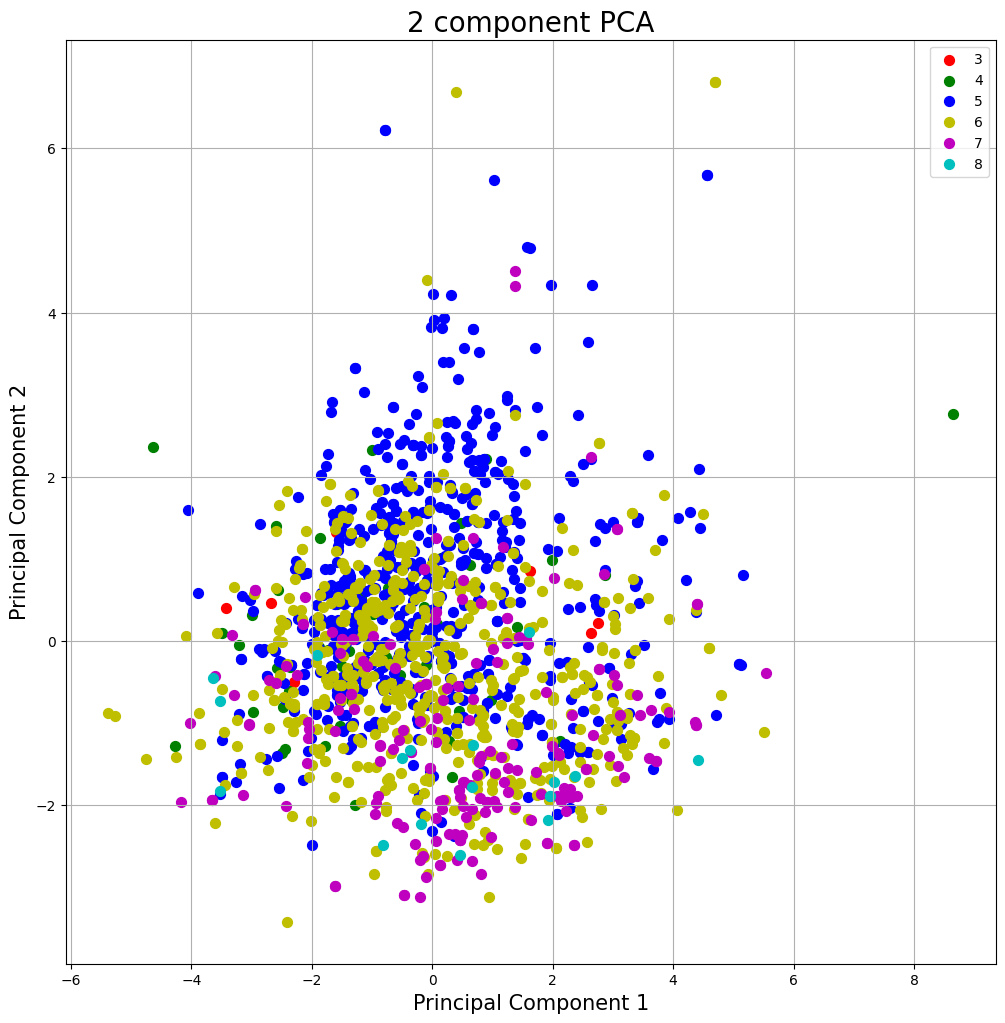

In [9]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = sorted(df['quality'].unique())
print(targets)

colors = ['r', 'g', 'b', 'y', 'm', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['quality'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()